<a href="https://colab.research.google.com/github/rakshadharanika/basic-nn-model/blob/main/exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 5ms/step - loss: 294.8576
Epoch 1503/4000
1/1 [==============================] - 0s 5ms/step - loss: 293.0354
Epoch 1504/4000
1/1 [==============================] - 0s 9ms/step - loss: 291.2260
Epoch 1505/4000
1/1 [==============================] - 0s 5ms/step - loss: 289.4292
Epoch 1506/4000
1/1 [==============================] - 0s 6ms/step - loss: 287.6453
Epoch 1507/4000
1/1 [==============================] - 0s 5ms/step - loss: 285.8744
Epoch 1508/4000
1/1 [==============================] - 0s 5ms/step - loss: 284.1162
Epoch 1509/4000
1/1 [==============================] - 0s 5ms/step - loss: 282.3711
Epoch 1510/4000
1/1 [==============================] - 0s 5ms/step - loss: 280.6389
Epoch 1511/4000
1/1 [==============================] - 0s 6ms/step - loss: 278.9198
Epoch 1512/4000
1/1 [==============================] - 0s 11ms/step - loss: 277.2137
Epoch 1513/4000
1/1 [===================

array([[60.049046]], dtype=float32)

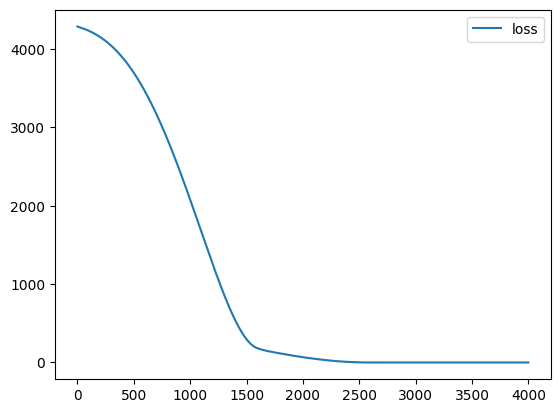

In [ ]:

import pandas as pd


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from google.colab import auth
import gspread
from google.auth import default




auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('exp 1').sheet1
data = worksheet.get_all_values()



dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})


dataset1.head()


X = dataset1[['Input']].values
y = dataset1[['Output']].values


X


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


Scaler = MinMaxScaler()


Scaler.fit(X_train)

X_train1 = Scaler.transform(X_train)
ai_brain = Sequential([
    Dense(5,activation = 'relu'),
    Dense(4,activation = 'relu'),
    Dense(1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1,y_train,epochs = 4000)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()
X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)
X_n1 = [[10]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)
